#### 示例

In [30]:
import pandas as pd
from sklearn.linear_model import LinearRegression
import time

In [34]:
df=pd.read_excel(r"C:\DBs_EDU\预测性分析（线性回归）.xlsx",engine="openpyxl")

In [35]:
df

,date,排名,价格,评论总数,评分
0,2017-01-01,17397,10.99,221,3.72398
1,2017-01-02,20457,10.99,221,3.72398
2,2017-01-03,21406,10.99,222,3.72973
3,2017-01-04,28214,10.99,222,3.72973
4,2017-01-05,30432,10.99,222,3.72973
...,...,...,...,...,...
542,2018-06-27,278284,19.99,251,3.73705
543,2018-06-28,296368,19.12,251,3.73705
544,2018-06-29,237946,18.64,251,3.73705
545,2018-06-30,100644,18.64,251,3.73705


In [6]:
df.dtypes

date    datetime64[ns]
排名               int64
价格             float64
评论总数             int64
评分             float64
dtype: object

In [8]:
df['date']=pd.to_datetime(df['date'])

In [9]:
df.dtypes

date    datetime64[ns]
排名               int64
价格             float64
评论总数             int64
评分             float64
dtype: object

In [22]:
df['date']

0     2017-01-01
1     2017-01-02
2     2017-01-03
3     2017-01-04
4     2017-01-05
         ...    
542   2018-06-27
543   2018-06-28
544   2018-06-29
545   2018-06-30
546   2018-07-01
Name: date, Length: 547, dtype: datetime64[ns]

In [36]:
df['date']= df['date'].apply(lambda x:time.mktime(x.timetuple()))

##### y=a=b1x+b2x2+b3x3+bnxn

#### 自变量

In [38]:
Z=df[['date','价格','评论总数','评分']]

In [39]:
lr=LinearRegression()

#### 回归

In [40]:
lr.fit(Z,df['排名'])

LinearRegression()

In [44]:
lr.intercept_

10284373.01351283

In [45]:
lr.coef_

array([-3.50030838e-03,  3.84763554e+03,  9.79250780e+03, -1.95029373e+06])

In [46]:
y_predict=lr.predict(Z)

In [207]:
y_predict

array([14208.62116069, 17337.94781741, 14608.06523222, 13549.46409763,
       26339.36206303, 14908.52623151, 20845.07679431, 18834.41494362,
       12555.32328052, 16140.63430151, 21225.12453192, 44513.43954565])

In [214]:
df_test=pd.DataFrame({'预测':[]})

In [215]:
df_test['预测']=y_predict

In [211]:
df_test

,预测
0,14208.621161
1,17337.947817
2,14608.065232
3,13549.464098
4,26339.362063
5,14908.526232
6,20845.076794
7,18834.414944
8,12555.323281
9,16140.634302


In [51]:
pd.DataFrame({'预测':y_predict})

,预测
0,36088.896299
1,35786.469655
2,34062.361849
3,33759.935205
4,33457.508561
...,...
542,175099.871126
543,171450.001562
544,169300.709859
545,168998.283215


#### 可视化

In [53]:
df

,date,排名,价格,评论总数,评分
0,1.483258e+09,17397,10.99,221,3.72398
1,1.483344e+09,20457,10.99,221,3.72398
2,1.483430e+09,21406,10.99,222,3.72973
3,1.483517e+09,28214,10.99,222,3.72973
4,1.483603e+09,30432,10.99,222,3.72973
...,...,...,...,...,...
542,1.530083e+09,278284,19.99,251,3.73705
543,1.530169e+09,296368,19.12,251,3.73705
544,1.530256e+09,237946,18.64,251,3.73705
545,1.530342e+09,100644,18.64,251,3.73705


In [54]:
import datetime
df['date']= df['date'].apply(lambda x:datetime.datetime.fromtimestamp(x))

In [55]:
df

,date,排名,价格,评论总数,评分
0,2017-01-01,17397,10.99,221,3.72398
1,2017-01-02,20457,10.99,221,3.72398
2,2017-01-03,21406,10.99,222,3.72973
3,2017-01-04,28214,10.99,222,3.72973
4,2017-01-05,30432,10.99,222,3.72973
...,...,...,...,...,...
542,2018-06-27,278284,19.99,251,3.73705
543,2018-06-28,296368,19.12,251,3.73705
544,2018-06-29,237946,18.64,251,3.73705
545,2018-06-30,100644,18.64,251,3.73705


In [61]:
df_new=pd.concat([df,pd.DataFrame({'预测排名':y_predict})],axis=1)

In [62]:
df_new

,date,排名,价格,评论总数,评分,预测排名
0,2017-01-01,17397,10.99,221,3.72398,36088.896299
1,2017-01-02,20457,10.99,221,3.72398,35786.469655
2,2017-01-03,21406,10.99,222,3.72973,34062.361849
3,2017-01-04,28214,10.99,222,3.72973,33759.935205
4,2017-01-05,30432,10.99,222,3.72973,33457.508561
...,...,...,...,...,...,...
542,2018-06-27,278284,19.99,251,3.73705,175099.871126
543,2018-06-28,296368,19.12,251,3.73705,171450.001562
544,2018-06-29,237946,18.64,251,3.73705,169300.709859
545,2018-06-30,100644,18.64,251,3.73705,168998.283215


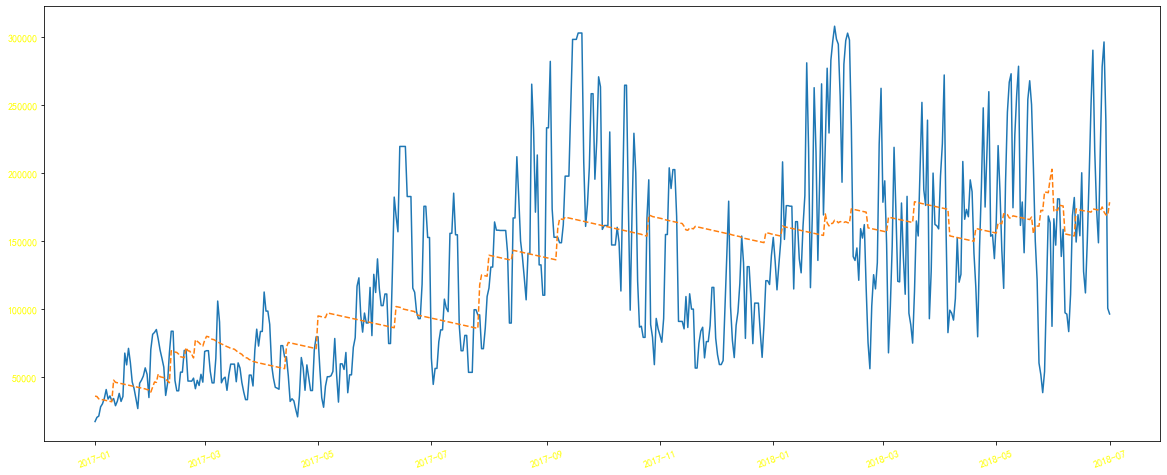

In [73]:
import matplotlib.pyplot as plt
###绘图代码
plt.figure(figsize=(20,8))
plt.xticks(rotation=20,color='yellow')
plt.yticks(color='yellow')
plt.plot(df_new['date'],df_new['排名'])
plt.plot(df_new['date'],df_new['预测排名'],linestyle='dashed')
plt.show()

#处理中文显示不出的问题
plt.rcParams['font.sans-serif']=['SimHei']#显示中文标签
#simhei是微软雅黑
plt.rcParams['font.size']='10'#修改轴上的字体大小

#### ZL实验

In [2]:
from TM1py.Services import TM1Service
from TM1py.Utils import Utils
import pandas as pd
from sklearn.linear_model import LinearRegression
import time
import matplotlib.pyplot as plt
import re

In [3]:
def transfer_c(tm1_src: TM1Service, tm1_tgr: TM1Service,cube_src:str,cube_tgr:str,vSecenario:str,vVersion:str,vOrderYear:str,vMonthDay:str,vCOACompany:str,vCurrency:str,vCountry:str,
            vRegionState:str,vRegionCity:str,vPlatfrom:str,vBehavior:str,vProduct:str,vDataSource:str):
    mdx='''
        SELECT 
          NON EMPTY 
           {[M ZL Amazon Payments Data STG].[M ZL Amazon Payments Data STG].Members}
          ON COLUMNS , 
          NON EMPTY 
           {[SA Year].[SA Year].Members}
           * {[SA Month].[SA Month].Members}
          ON ROWS 
        FROM ['''+cube_src+'''] 
        WHERE 
          (
           [Scenario].[Scenario].['''+vSecenario+'''],
           [Version].[Version].['''+vVersion+'''],
           [Order Year].[Order Year].['''+vOrderYear+'''],
           [Month Day].[Month Day].['''+vMonthDay+'''],
           [COA Company].[COA Company].['''+vCOACompany+'''],
           [Currency].[Currency].['''+vCurrency+'''],
           [Country].[Country].['''+vCountry+'''],
           [Region State].[Region State].['''+vRegionState+'''],
           [Region City].[Region City].['''+vRegionCity+'''],
           [Platform].[Platform].['''+vPlatfrom+'''],
           [Behavior].[Behavior].['''+vBehavior+'''],
           [Product].[Product].['''+vProduct+'''],
           [Data Source Payments Data STG].[Data Source Payments Data STG].['''+vDataSource+''']
          )

         '''
    #元组字典
    cells=tm1_src.cubes.cells.execute_mdx(mdx,skip_rule_derived_cells=True,skip_zeros=True)
    df = Utils.build_pandas_dataframe_from_cellset(cells)
    df.reset_index(inplace=True)
    df_filter=df[(df['SA Year']!='Year Rollup')& (df['SA Year']!='All Years')&(df['SA Month'].apply(lambda x:re.match('^M..$',x,re.IGNORECASE)))]
    df_pivot=df_filter.pivot(index=['Scenario','SA Year','SA Month','Version','Order Year','Month Day','COA Company','Currency','Country','Region State'
                              ,'Region City','Platform','Behavior','Product','Data Source Payments Data STG'],columns='M ZL Amazon Payments Data STG'
                      ,values='Values').reset_index().reset_index(drop=True)
    
    
    return df_pivot

In [14]:
def linear_model_ACT(df:'pd.DataFrame'):
    #获取实际数数据df
    
    #日期处理
    df['yearmonth']=df['SA Year']+'-'+df['SA Month'].str.slice(1,3)
    df['yearmonth']=pd.to_datetime(df['yearmonth'])
    df['yearmonth']= df['yearmonth'].apply(lambda x:time.mktime(x.timetuple()))
    #自变量定义
    Z=df[['Fba_fees','Product_sales','Selling_fees','yearmonth']]
    #回归
    lr=LinearRegression()
    lr.fit(Z,df['Quantity'])
    print('intercept:',lr.intercept_)
    print('coef',lr.coef_)
    
    return lr
#处理目标cube的数据
def transfer_n(tm1_src: TM1Service, tm1_tgr: TM1Service,cube_src:str,cube_tgr:str,vSecenario:str,vVersion:str,vOrderYear:str,vMonthDay:str,vCOACompany:str,vCurrency:str,vCountry:str,
            vRegionState:str,vRegionCity:str,vPlatfrom:str,vBehavior:str,vProduct:str,vDataSource:str):
        mdx='''
            SELECT 
              NON EMPTY 
               {[M ZL Amazon Payments Data STG].[M ZL Amazon Payments Data STG].Members}
              ON COLUMNS , 
              NON EMPTY 
               {[SA Year].[SA Year].Members}
               * {[SA Month].[SA Month].Members}
              ON ROWS 
            FROM ['''+cube_tgr+'''] 
            WHERE 
              (
               [Scenario].[Scenario].['''+vSecenario+'''],
               [Version].[Version].['''+vVersion+'''],
               [Order Year].[Order Year].['''+vOrderYear+'''],
               [Month Day].[Month Day].['''+vMonthDay+'''],
               [COA Company].[COA Company].['''+vCOACompany+'''],
               [Currency].[Currency].['''+vCurrency+'''],
               [Country].[Country].['''+vCountry+'''],
               [Region State].[Region State].['''+vRegionState+'''],
               [Region City].[Region City].['''+vRegionCity+'''],
               [Platform].[Platform].['''+vPlatfrom+'''],
               [Behavior].[Behavior].['''+vBehavior+'''],
               [Product].[Product].['''+vProduct+'''],
               [Data Source Payments Data STG].[Data Source Payments Data STG].['''+vDataSource+''']
              )

             '''
        #元组字典
        cells=tm1_src.cubes.cells.execute_mdx(mdx,skip_rule_derived_cells=True,skip_zeros=True,skip_consolidated_cells=True)
        df_nlevel = Utils.build_pandas_dataframe_from_cellset(cells)
        df_nlevel=df_nlevel.reset_index()
        df_pivot_n=df_nlevel.pivot(index=['Scenario','SA Year','SA Month','Version','Order Year','Month Day','COA Company','Currency','Country','Region State'
                              ,'Region City','Platform','Behavior','Product','Data Source Payments Data STG'],columns='M ZL Amazon Payments Data STG'
                      ,values='Values').reset_index().reset_index(drop=True)
        
    return df_pivot_n

def linear_model_FCST(df:'pd.DataFrame',lr:'LinearRegress'):
    #处理目标cube的日期
    df['yearmonth']=df['SA Year']+'-'+df['SA Month'].str.slice(1,3)
    df['yearmonth']=pd.to_datetime(df['yearmonth'])
    df['yearmonth']= df['yearmonth'].apply(lambda x:time.mktime(x.timetuple()))
    
    #回归预测
    Z_tgr=df[['Fba_fees','Product_sales','Selling_fees','yearmonth']]
    y_predict=lr.predict(Z_tgr)
    df['Quantity']=y_predict
    df.drop(['yearmonth'],axis=1,inplace=True)
    df_ready=df.melt(id_vars=['Scenario','SA Year','SA Month','Version','Order Year','Month Day','COA Company','Currency','Country','Region State'
                        ,'Region City','Platform','Behavior','Product','Data Source Payments Data STG'],var_name=['M ZL Amazon Payments Data STG'],value_name='Values')
    #获取待回写的Dataframe   
    return df_ready
    

In [15]:
tm1_src = TM1Service(address="192.168.0.176", port=30015, ssl=False, user="neil", password="123")
tm1_tgr = TM1Service(address="192.168.0.176", port=30015, ssl=False, user="neil", password="123")
df_src=transfer_c(tm1_src,tm1_tgr,'Bkp_ZL Amazon Payments Data STG','Bkp_ZL Amazon Payments Data STG','ACT','WIP','All Years','All Months','All Company List','USD','All Country List','All Region State List','All Region City List'
         ,'All Platform List','所有类型','All Products','All Datasources')
df_tgr=transfer_n(tm1_src,tm1_tgr,'Bkp_ZL Amazon Payments Data STG','Bkp_ZL Amazon Payments Data STG','ACT','WIP','2018','01-16','002','USD','US','Ca','Bakersfield'
         ,'03','商品销售','LSKU1177','Base')

lr=linear_model_ACT(df_src)
df=linear_model_FCST(df_tgr,lr)

intercept: 345495.77446905576
coef [-2.30777224e-01  3.71759948e-01  2.56221856e+00 -2.28509714e-04]


In [16]:
df

,Scenario,SA Year,SA Month,Version,Order Year,Month Day,COA Company,Currency,Country,Region State,Region City,Platform,Behavior,Product,Data Source Payments Data STG,M ZL Amazon Payments Data STG,Values
0,ACT,2018,M01,WIP,2018,01-16,002,USD,US,Ca,Bakersfield,03,商品销售,LSKU1177,Base,Fba_fees,-4.180000
1,ACT,2018,M01,WIP,2018,01-16,002,USD,US,Ca,Bakersfield,03,商品销售,LSKU1177,Base,Product_sales,13.990000
2,ACT,2018,M01,WIP,2018,01-16,002,USD,US,Ca,Bakersfield,03,商品销售,LSKU1177,Base,Quantity,-648.493396
3,ACT,2018,M01,WIP,2018,01-16,002,USD,US,Ca,Bakersfield,03,商品销售,LSKU1177,Base,Selling_fees,-2.100000


In [18]:
import asyncio
import nest_asyncio
nest_asyncio.apply()
from concurrent.futures import ThreadPoolExecutor
from random import random
from typing import List

from TM1py import TM1Service
from TM1py.Utils import Utils

In [20]:
async def linear_transfer_async(lr:'LinearRegress',tm1_src: TM1Service, tm1_tgr: TM1Service,cube_src:str,cube_tgr:str,Secenario:List,Version:List,OrderYear:List,MonthDay:List
                         ,COACompany:List,Currency:List,Country:List,RegionState:List,RegionCity:List,Platfrom:List,Behavior:List,Product:List,DataSource:List):
    loop = asyncio.get_event_loop()
    
    with ThreadPoolExecutor(4) as executor:
        #futures = [loop.run_in_executor(executor, transfer, tm1_src, tm1_tgr,cube_src, cube_tgr,month_leaf) for month_leaf in leaves]
        futures=[]
        for se in Secenario:
            for ve in Version:
                for orde in OrderYear:
                    for mon in MonthDay:
                        for co in COACompany:
                            for cu in Currency:
                                for coun in Country:
                                    for regs in RegionState:
                                        for regc in RegionCity:
                                            for pla in Platfrom:
                                                for beh in Behavior:
                                                    for pro in Product:
                                                        for datas in DataSource:
                                                            f=loop.run_in_executor(executor, linear_transfer, tm1_src, tm1_tgr,cube_src, cube_tgr,se,
                                                                                  ve,orde,mon,co,cu,coun,regs,regc,pla,beh,pro,datas)
                                                            futures.append(f)
                                        
                            
        
        for future in futures:
            try:
                await future
            except:
                #print(future)
                continue






def linear_transfer(lr:'LinearRegress',tm1_src: TM1Service, tm1_tgr: TM1Service,cube_src:str,cube_tgr:str,vSecenario:str,vVersion:str,vOrderYear:str,vMonthDay:str
                    ,vCOACompany:str,vCurrency:str,vCountry:str,
            vRegionState:str,vRegionCity:str,vPlatfrom:str,vBehavior:str,vProduct:str,vDataSource:str):
    
    df_tgr=transfer_n(tm1_src,tm1_tgr,cube_src,cube_tgr,vSecenario,vVersion,vOrderYear,vMonthDay,vCOACompany,vCurrency,vCountry,vRegionState,vRegionCity
         ,vPlatfrom,vBehavior,vProduct,vDataSource)
    df=linear_model_FCST(df_tgr,lr)
    mdx_clr='''
            SELECT 
              NON EMPTY 
               {[M ZL Amazon Payments Data STG].[M ZL Amazon Payments Data STG].[Quantity]}
              ON COLUMNS , 
              NON EMPTY 
               {[SA Year].[SA Year].Members}
               * {[SA Month].[SA Month].Members}
              ON ROWS 
            FROM ['''+cube_tgr+'''] 
            WHERE 
              (
               [Scenario].[Scenario].['''+vSecenario+'''],
               [Version].[Version].['''+vVersion+'''],
               [Order Year].[Order Year].['''+vOrderYear+'''],
               [Month Day].[Month Day].['''+vMonthDay+'''],
               [COA Company].[COA Company].['''+vCOACompany+'''],
               [Currency].[Currency].['''+vCurrency+'''],
               [Country].[Country].['''+vCountry+'''],
               [Region State].[Region State].['''+vRegionState+'''],
               [Region City].[Region City].['''+vRegionCity+'''],
               [Platform].[Platform].['''+vPlatfrom+'''],
               [Behavior].[Behavior].['''+vBehavior+'''],
               [Product].[Product].['''+vProduct+'''],
               [Data Source Payments Data STG].[Data Source Payments Data STG].['''+vDataSource+''']
              )

             '''
    #clear
    tm1_tgr.cells.clear_with_mdx(cube_tgr,mdx_clr)
    #Writing to tgr Cube
    tm1_tgr.cells.write_dataframe(
        cube_name=cube_tgr,
        data=df,
        dimensions=['Scenario','SA Year','SA Month','Version','Order Year','Month Day','COA Company','Currency','Country','Region State'
                   ,'Region City','Platform','Behavior','Product','Data Source Payments Data STG','M ZL Amazon Payments Data STG'],
        increment=False,
        deactivate_transaction_log=True,
        reactivate_transaction_log=True,
        sandbox_name=None,
        use_ti=True,
        skip_non_updateable=True,
        use_changeset=False)
    

In [ ]:
tm1_src = TM1Service(address="192.168.0.176", port=30015, ssl=False, user="neil", password="123")
tm1_tgr = TM1Service(address="192.168.0.176", port=30015, ssl=False, user="neil", password="123")
scenario =['FCST M01 CY2019'] 
version=['WIP']
orderyear=tm1_src.elements.get_leaf_element_names("Order Year", "Order Year")
monthday=tm1_src.elements.get_leaf_element_names("Month Day", "Month Day")
coacompany=tm1_src.elements.get_leaf_element_names("COA Company", "COA Company")
currency=tm1_src.elements.get_leaf_element_names("Currency", "Currency")
country=tm1_src.elements.get_leaf_element_names("Country", "Country")
regionstate=tm1_src.elements.get_leaf_element_names("Region State", "Region State")
regioncity=tm1_src.elements.get_leaf_element_names("Region City", "Region City")
platform=tm1_src.elements.get_leaf_element_names("Platform", "Platform")
behavior=tm1_src.elements.get_leaf_element_names("Behavior", "Behavior")
product=tm1_src.elements.get_leaf_element_names("Product", "Product")
datasource=tm1_src.elements.get_leaf_element_names("Data Source Payments Data STG", "Data Source Payments Data STG")

df_src=transfer_c(tm1_src,tm1_tgr,'Bkp_ZL Amazon Payments Data STG','Bkp_ZL Amazon Payments Data STG','ACT','WIP','All Years','All Months','All Company List','USD','All Country List','All Region State List','All Region City List'
         ,'All Platform List','所有类型','All Products','All Datasources')
lr=linear_model_ACT(df_src)

asyncio.run(linear_transfer_async(lr,tm1_src, tm1_tgr, 'Bkp_ZL Amazon Payments Data STG','Bkp_ZL Amazon Payments Data STG',scenario,version,orderyear
                                  ,monthday,coacompany,currency,country,regionstate,regioncity
                                  ,platform,behavior,product,datasource))


intercept: 345495.77446913184
coef [-2.30777224e-01  3.71759948e-01  2.56221856e+00 -2.28509714e-04]


In [194]:
tm1_src = TM1Service(address="192.168.0.176", port=30015, ssl=False, user="neil", password="123")
tm1_tgr = TM1Service(address="192.168.0.176", port=30015, ssl=False, user="neil", password="123")
df_nlevel=transfer_n(tm1_src,tm1_tgr,'Bkp_ZL Amazon Payments Data STG','Bkp_ZL Amazon Payments Data STG','ACT','WIP','2018','01-16','002','USD','US','Ca','Bakersfield'
         ,'03','商品销售','LSKU1177','Base')